# Deep Learning Fundamental - Assignment 3 RNNs for stock price prediction

## 1. Data Loading and preprocessing
### 1.1 Data loading

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import tensorflow as tf
tf.get_logger().setLevel('ERROR')

import warnings
warnings.filterwarnings("ignore")

# Set random seed for Python, NumPy, and TensorFlow
random.seed(42)
np.random.seed(42)
tensorflow.random.set_seed(42)

# Load training and testing datasets
full_data = pd.read_csv('GoogleStock_Dataset_V2.csv')

# Reset the index for the filtered dataset
full_data.reset_index(drop=True, inplace=True)

# Display the shape and the first few rows of the Google dataset
print(f"Google Stock dataset shape: {full_data.shape}")
print(full_data.head())

Google Stock dataset shape: (2775, 7)
   Unnamed: 0        Date       Open       High        Low      Close  \
0           0  2013-01-02  17.918339  18.107130  17.846855  18.013729   
1           1  2013-01-03  18.055573  18.229919  17.950716  18.024191   
2           2  2013-01-04  18.165413  18.467529  18.124067  18.380356   
3           3  2013-01-07  18.317591  18.415474  18.196297  18.300158   
4           4  2013-01-08  18.319834  18.338762  18.043119  18.264042   

      Volume  
0  102033017  
1   93075567  
2  110954331  
3   66476239  
4   67295297  


In [2]:
full_data.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
2770,2770,2024-01-04,139.850006,140.634995,138.009995,138.039993,18253300
2771,2771,2024-01-05,138.352005,138.809998,136.850006,137.389999,15433200
2772,2772,2024-01-08,138.000000,140.639999,137.880005,140.529999,17645300
2773,2773,2024-01-09,140.059998,142.800003,139.789993,142.559998,19579700
2774,2774,2024-01-10,142.520004,144.524994,142.460007,143.800003,16621800


In [3]:
print(full_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2775 non-null   int64  
 1   Date        2775 non-null   object 
 2   Open        2775 non-null   float64
 3   High        2775 non-null   float64
 4   Low         2775 non-null   float64
 5   Close       2775 non-null   float64
 6   Volume      2775 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 151.9+ KB
None


### 1.2 Data cleaning

In [4]:
# Convert 'Date' column to datetime format
full_data['Date'] = pd.to_datetime(full_data['Date'])

In [5]:
# set 'Date' to the index
full_data.set_index('Date',drop=True,inplace=True)

In [6]:
# Drop the 'Unnamed: 0' column
full_data.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
print(full_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2775 entries, 2013-01-02 to 2024-01-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2775 non-null   float64
 1   High    2775 non-null   float64
 2   Low     2775 non-null   float64
 3   Close   2775 non-null   float64
 4   Volume  2775 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 130.1 KB
None


In [8]:
full_data.describe()

,Open,High,Low,Close,Volume
count,2775.000000,2775.000000,2775.000000,2775.000000,2.775000e+03
mean,64.913671,65.600115,64.273645,64.952090,3.828731e+07
std,38.164394,38.630869,37.753744,38.194190,2.612174e+07
min,17.550716,17.567652,17.323069,17.506132,1.584340e+05
25%,32.755501,33.153002,32.346251,32.710751,2.356953e+07
50%,54.200001,54.778500,53.616100,54.249500,3.023200e+07
75%,94.466000,96.004997,93.208252,94.619999,4.305293e+07
max,151.863495,152.100006,149.887497,150.709000,4.643901e+08


### 1.3 Data visulisation

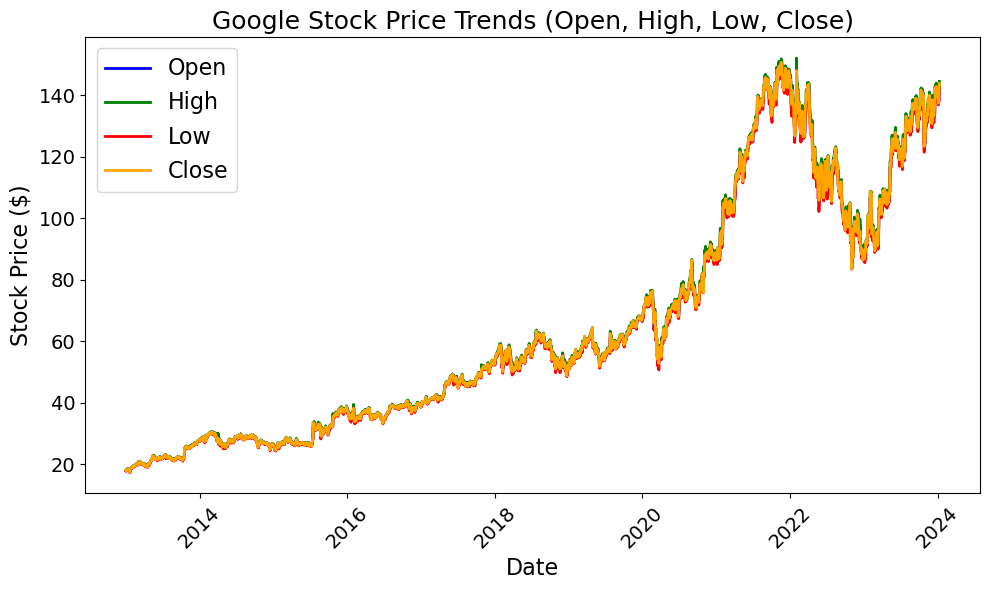

In [9]:
# Create the plot to display trends for 'Open', 'High', 'Low', 'Close'
plt.figure(figsize=(10, 6))

# Plot the time series for 'Open', 'High', 'Low', 'Close'
plt.plot(full_data.index, full_data['Open'], label='Open', color='blue', linewidth=2)
plt.plot(full_data.index, full_data['High'], label='High', color='green', linewidth=2)
plt.plot(full_data.index, full_data['Low'], label='Low', color='red', linewidth=2)
plt.plot(full_data.index, full_data['Close'], label='Close', color='orange', linewidth=2)

# Add title and axis labels
plt.title('Google Stock Price Trends (Open, High, Low, Close)', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Stock Price ($)', fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

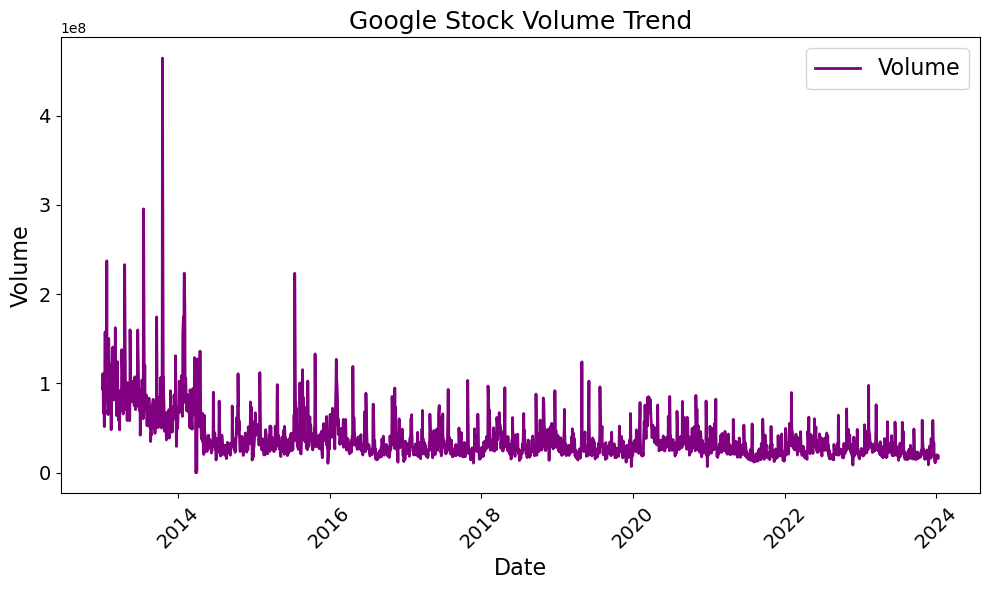

In [10]:
# Create a plot to display trends for Volume
plt.figure(figsize=(10, 6))

# Plot the time series for 'Volume'
plt.plot(full_data.index, full_data['Volume'], label='Volume', color='purple', linewidth=2)

# Add title and axis labels
plt.title('Google Stock Volume Trend', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Volume', fontsize=16)
plt.legend(loc='upper right', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

### 1.4 Data preprocessing

In [11]:
# Prepare the data
# Use the last 20 days to predict the next day's close
def create_sequence(df):
    sequences = []
    labels = []
    for i in range(len(df) - 20):
        sequences.append(df.iloc[i : i + 20])  # Features
        labels.append(df.iloc[i + 20])        # Target (next day's close)
    return np.array(sequences), np.array(labels)


In [12]:
predictor = ['Close']
full_data = full_data['Close']

In [13]:
# Create feature and label sequences
X, y = create_sequence(full_data)

# Define the split sizes
train_size = int(len(X) * 0.8) 
val_size = int(len(X) * 0.1) 

# Define train, validation, and test splits
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

# Use MinMaxScaler to scale the features
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale the features by reshaping to 2D (samples, features) for MinMaxScaler
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, 1))  # Reshape to 2D for scaling
X_val_scaled = scaler_X.transform(X_val.reshape(-1, 1))          # Transform using the same scaler
X_test_scaled = scaler_X.transform(X_test.reshape(-1, 1))

# Reshape to the 3D format (samples, timesteps, features)
X_train_scaled = X_train_scaled.reshape(X_train.shape[0], X_train.shape[1], 1)  
X_val_scaled = X_val_scaled.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test.shape[0], X_test.shape[1], 1)

# Scale the labels
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_val_scaled = scaler_y.transform(y_val.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Output the shape of the split datasets
print(f"X_train_scaled shape: {X_train_scaled.shape}, y_train_scaled shape: {y_train_scaled.shape}")
print(f"X_val_scaled shape: {X_val_scaled.shape}, y_val_scaled shape: {y_val_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}, y_test_scaled shape: {y_test_scaled.shape}")

X_train_scaled shape: (2204, 20, 1), y_train_scaled shape: (2204, 1)
X_val_scaled shape: (275, 20, 1), y_val_scaled shape: (275, 1)
X_test_scaled shape: (276, 20, 1), y_test_scaled shape: (276, 1)


## 2. Vanilla RNN Model
### 2.1 Baseline model

In [15]:
# Function to train and evaluate the baseline model
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)
    
    # Plot the training and validation MSE curves
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train MSE') 
    plt.plot(history.history['val_loss'], label='Validation MSE')  
    plt.title("MSE Curve - Model")
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()
    
    # Make predictions on the validation set (use the scaled data)
    y_pred_val_scaled = model.predict(X_val)
    
    # Inverse transform the predictions and the true values
    y_pred_val = scaler_y.inverse_transform(y_pred_val_scaled)
    y_val_original = scaler_y.inverse_transform(y_val)
    
    # Calculate RMSE, MAE, and MAPE for the validation set
    rmse_val = np.sqrt(mean_squared_error(y_val_original, y_pred_val))
    mae_val = mean_absolute_error(y_val_original, y_pred_val)
    mape_val = mean_absolute_percentage_error(y_val_original, y_pred_val)

    print(f"Baseline Model Validation RMSE: {rmse_val:.4f}")
    print(f"Baseline Model Validation MAE: {mae_val:.4f}")
    print(f"Baseline Model Validation MAPE: {mape_val * 100:.2f}%")

In [16]:
# Function to build a vanilla RNN model
def create_vanilla_rnn_model(input_shape, hidden_units=32, learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(input_shape)))
    model.add(SimpleRNN(hidden_units)) 
    model.add(Dropout(0.2))  # Dropout layer for regularisation
    model.add(Dense(1))  # Output layer for regression task
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

Training baseline Model...
Epoch 1/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0573 - val_loss: 0.1822
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0392 - val_loss: 0.1213
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0315 - val_loss: 0.0887
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0236 - val_loss: 0.0633
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0190 - val_loss: 0.0491
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0157 - val_loss: 0.0394
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0128 - val_loss: 0.0296
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0108 - val_loss: 0.0272
Epoch 9/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0088 - val_loss: 0.0207
Epoch 10/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0096 - val_loss: 0.0153
Epoch 11/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0077 - val_loss: 0.0102
Epoch 12/100
69/69 ━━━━━━━━━━━━━━━━━

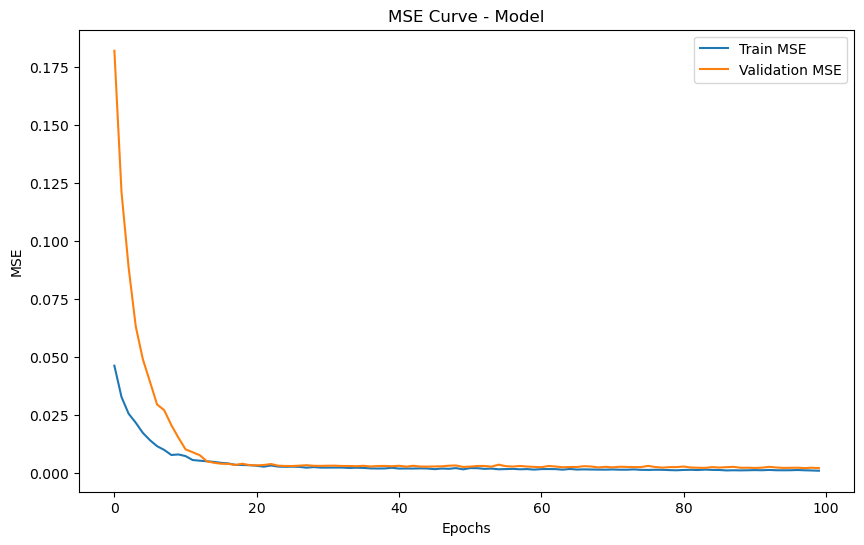

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Baseline Model Validation RMSE: 6.0064
Baseline Model Validation MAE: 4.9908
Baseline Model Validation MAPE: 4.28%


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,365 (13.15 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,244 (8.77 KB)

In [17]:
# Get the shape of the input data
input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2]) 

# Create and train the GRU model
baseline_model = create_vanilla_rnn_model(input_shape, 32, 0.00005)
print("Training baseline Model...")

train_and_evaluate_model(baseline_model, X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled)
baseline_model.summary()

## 3. GRU Model and Hyperparameter Optimisation

In [18]:
# Define the GRU model function
def create_gru_model(input_shape, hidden_units, learning_rate):
    model = Sequential()
    model.add(Input(shape=input_shape)) 
    model.add(GRU(units=hidden_units))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))  # Output layer
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')  
    return model

In [19]:
# Function to build a GRU model
def train_and_evaluate_model_update(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32):
    # Early stopping: stop training if validation loss doesn't improve for 10 epochs
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
    
    # ReduceLROnPlateau: reduce learning rate if validation loss doesn't improve for 5 epochs
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', verbose=0)
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_val, y_val), verbose=1,
                        callbacks=[early_stop, reduce_lr])
    
    # Plot the training and validation loss curves
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss') 
    plt.plot(history.history['val_loss'], label='Validation Loss') 
    plt.title("Loss Curve - Model")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Make predictions on the validation set (predictions will be on scaled data)
    y_pred_val_scaled = model.predict(X_val)
    
    # Inverse scale the predictions and true values to their original scale
    y_pred_val = scaler_y.inverse_transform(y_pred_val_scaled)
    y_val_original = scaler_y.inverse_transform(y_val)
    
    # Calculate RMSE, MAE, and MAPE for the validation set (on original scale)
    rmse_val = np.sqrt(mean_squared_error(y_val_original, y_pred_val))
    mae_val = mean_absolute_error(y_val_original, y_pred_val)
    mape_val = mean_absolute_percentage_error(y_val_original, y_pred_val)
    
    print(f"GRU Validation RMSE: {rmse_val:.4f}")
    print(f"GRU Validation MAE: {mae_val:.4f}")
    print(f"GRU Validation MAPE: {mape_val * 100:.2f}%")

Training GRU Model...
Epoch 1/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1428 - val_loss: 0.6742 - learning_rate: 5.0000e-05
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1088 - val_loss: 0.5394 - learning_rate: 5.0000e-05
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0814 - val_loss: 0.4259 - learning_rate: 5.0000e-05
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0617 - val_loss: 0.3300 - learning_rate: 5.0000e-05
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0469 - val_loss: 0.2520 - learning_rate: 5.0000e-05
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0369 - val_loss: 0.1918 - learning_rate: 5.0000e-05
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0291 - val_loss: 0.1479 - learning_rate: 5.0000e-05
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0243 - val_loss: 0.1164 - learning_rate: 5.0000e-05
Epoch 9/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0212 - val_lo

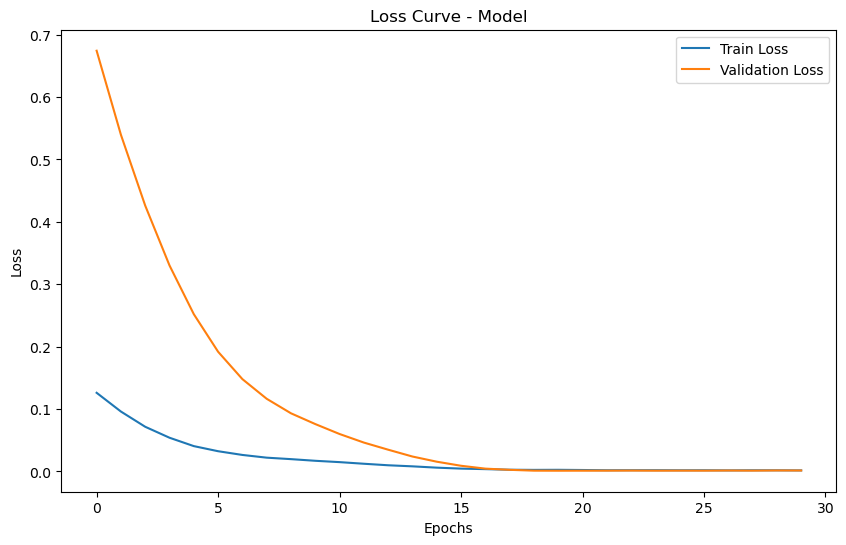

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
GRU Validation RMSE: 4.3060
GRU Validation MAE: 3.5587
GRU Validation MAPE: 3.02%


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 32)             │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,181 (39.77 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,788 (26.52 KB)

In [20]:
# Train the GRU model
gru_model = create_gru_model(input_shape, 32, 0.00005)
print("Training GRU Model...")

train_and_evaluate_model_update(gru_model, X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled)
gru_model.summary()

In [21]:
# Function for hyperparameter optimisation
def hyperparameter_tuning(X_train, y_train, X_val, y_val, input_shape):
     # Early stopping: stop training if validation loss doesn't improve for 10 epochs
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
    
    # ReduceLROnPlateau: reduce learning rate if validation loss doesn't improve for 5 epochs
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=0)
    
    # Define hyperparameter grid
    param_grid = {
        'hidden_units': [32, 64, 128],
        'learning_rate': [0.00001, 0.0001, 0.001, 0.01],
        'batch_size': [16, 32, 64]
    }
    
    best_rmse = float('inf')
    best_model = None
    best_params = None
    
    print("Hyperparameter tuning progress:")
    
    # Iterate over all combinations of hyperparameters
    for hidden_units in param_grid['hidden_units']:
        for learning_rate in param_grid['learning_rate']:
            for batch_size in param_grid['batch_size']:
                
                # GRU model
                model = create_gru_model(input_shape, hidden_units, learning_rate)
                
                # Train the model with early stopping and learning rate reduction
                history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size,
                                    validation_data=(X_val, y_val), verbose=0,
                                    callbacks=[early_stop, reduce_lr])
                
                # Predict on the validation set and calculate RMSE
                y_pred_val_scaled = model.predict(X_val, verbose=0) 
                y_pred_val = scaler_y.inverse_transform(y_pred_val_scaled)  # Inverse transform predictions
                y_val_original = scaler_y.inverse_transform(y_val)  # Inverse transform the true values
                rmse_val = np.sqrt(mean_squared_error(y_val_original, y_pred_val))
                
                # Print the current combination and RMSE
                print(f"Hyperparameter combination: Hidden Units: {hidden_units}, Learning Rate: {learning_rate}, "
                      f"Batch Size: {batch_size} -> Validation RMSE: {rmse_val:.4f}")
                
                # Update the best model if current RMSE is lower
                if rmse_val < best_rmse:
                    best_rmse = rmse_val
                    best_model = model
                    best_params = {'hidden_units': hidden_units, 'learning_rate': learning_rate, 'batch_size': batch_size}
    
    # Print the best hyperparameters and corresponding validation RMSE
    print("\nBest RMSE on Validation Set:", f"{best_rmse:.4f}")
    print("Best Hyperparameters:", best_params)
    

    # Plot the loss curves for the best model
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Loss Curve - Best Model", fontsize=16) 
    plt.xlabel('Epochs', fontsize=14) 
    plt.ylabel('Loss', fontsize=14) 
    plt.legend(fontsize=14)
    plt.show()
    
    # Evaluate the best model on the validation set
    y_pred_val_scaled = best_model.predict(X_val, verbose=0)  
    y_pred_val = scaler_y.inverse_transform(y_pred_val_scaled)
    y_val_original = scaler_y.inverse_transform(y_val)

    rmse_val = np.sqrt(mean_squared_error(y_val_original, y_pred_val))
    mae_val = mean_absolute_error(y_val_original, y_pred_val)
    mape_val = mean_absolute_percentage_error(y_val_original, y_pred_val)
    
    # Print evaluation metrics
    print(f"Best Model Validation RMSE: {rmse_val:.4f}")
    print(f"Best Model Validation MAE: {mae_val:.4f}")
    print(f"Best Model Validation MAPE: {mape_val * 100:.2f}%")
    
    # Return the best model
    return best_model

Hyperparameter tuning progress:
Hyperparameter combination: Hidden Units: 32, Learning Rate: 1e-05, Batch Size: 16 -> Validation RMSE: 4.1966
Hyperparameter combination: Hidden Units: 32, Learning Rate: 1e-05, Batch Size: 32 -> Validation RMSE: 88.5015
Hyperparameter combination: Hidden Units: 32, Learning Rate: 1e-05, Batch Size: 64 -> Validation RMSE: 118.7409
Hyperparameter combination: Hidden Units: 32, Learning Rate: 0.0001, Batch Size: 16 -> Validation RMSE: 3.7329
Hyperparameter combination: Hidden Units: 32, Learning Rate: 0.0001, Batch Size: 32 -> Validation RMSE: 82.7583
Hyperparameter combination: Hidden Units: 32, Learning Rate: 0.0001, Batch Size: 64 -> Validation RMSE: 90.1788
Hyperparameter combination: Hidden Units: 32, Learning Rate: 0.001, Batch Size: 16 -> Validation RMSE: 3.1425
Hyperparameter combination: Hidden Units: 32, Learning Rate: 0.001, Batch Size: 32 -> Validation RMSE: 8.9458
Hyperparameter combination: Hidden Units: 32, Learning Rate: 0.001, Batch Size: 

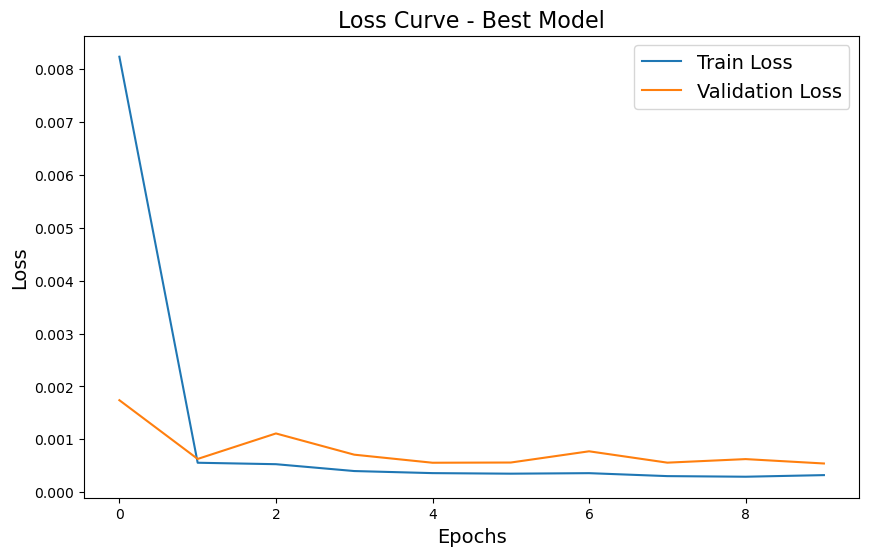

Best Model Validation RMSE: 2.7204
Best Model Validation MAE: 2.1020
Best Model Validation MAPE: 1.78%


In [22]:

best_model = hyperparameter_tuning(X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, input_shape)

In [23]:
best_model.summary()

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_34 (GRU)                    │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,301 (591.02 KB)

 Trainable params: 50,433 (197.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 100,868 (394.02 KB)

# 4. The Best Model Evaluation on the Test Set

In [24]:
# Predict on the test set (scaled data)
y_pred_test_scaled = best_model.predict(X_test_scaled)

# Inverse transform the predictions and the true values
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled)  # Inverse transform the predictions
y_test_original = scaler_y.inverse_transform(y_test_scaled)  # Inverse transform the true values

# Calculate RMSE, MAE, and MAPE for the test set (on original scale)
rmse_test = np.sqrt(mean_squared_error(y_test_original, y_pred_test))
mae_test = mean_absolute_error(y_test_original, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test_original, y_pred_test)

# Print evaluation metrics for the test set
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test MAE: {mae_test:.4f}")
print(f"Test MAPE: {mape_test * 100:.2f}%")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test RMSE: 2.2354
Test MAE: 1.6639
Test MAPE: 1.43%


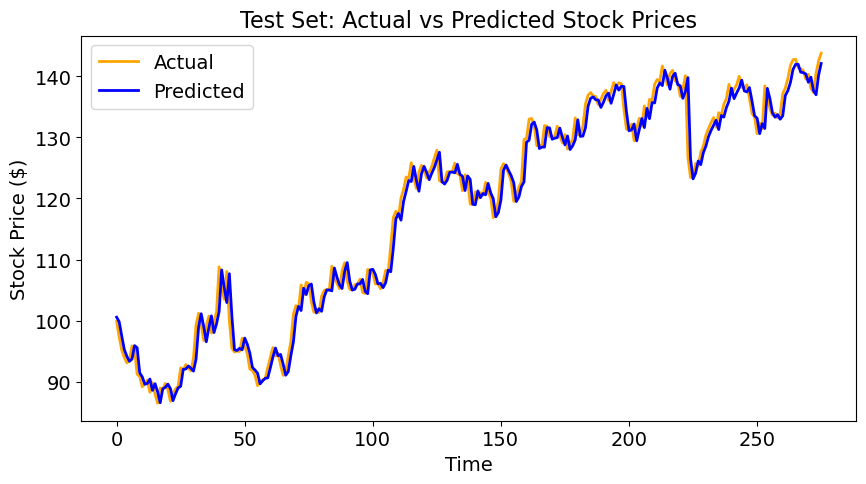

Test R²: 0.9836


In [25]:
# Plot the predictions vs actual values on the test set
plt.figure(figsize=(10, 5))
plt.plot(y_test_original, label='Actual', color='orange', linewidth=2)
plt.plot(y_pred_test, label='Predicted', color='blue', linewidth=2)
plt.title('Test Set: Actual vs Predicted Stock Prices', fontsize=16)  
plt.xlabel('Time', fontsize=14) 
plt.ylabel('Stock Price ($)', fontsize=14)  
plt.legend(fontsize=14)  

# Remove grid lines
plt.grid(False)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.show()

# Calculate and print the R² value for the test set
r2_test = r2_score(y_test_original, y_pred_test)
print(f"Test R²: {r2_test:.4f}")

### References

1. Taha Emre Pamukcu (1 year ago). *RNN And LSTM Tutorial For Beginners*. Retrieved from [https://www.kaggle.com/code/moonglow22/rnn-and-lstm-tutorial-for-beginners#Long-Short-Term-Memory-(LSTMs)].

2. Itsakphyo (8 months ago). *RNN vs GRU on Google Stock Prediction*. Retrieved from [https://www.kaggle.com/code/itsakphyo/rnn-vs-gru-on-google-stock-prediction].